In [2]:
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import math as m

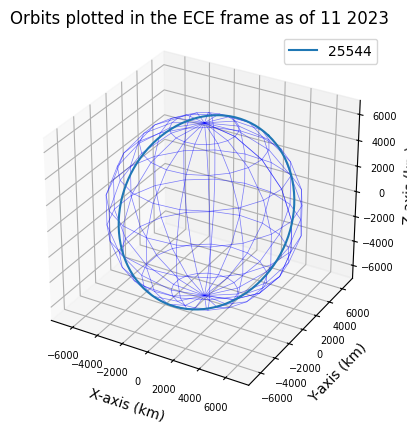

In [10]:
mu = 398600.4418
r = 6781
D = 24*0.997269

def plot_tle(data):
    fig = plt.figure()
    ax = plt.axes(projection='3d',computed_zorder=False)
    for i in range(len(data)//2):
        if data[i*2][0] != "1":
            print("Wrong TLE format at line "+str(i*2)+". Lines ignored.")
            continue
        if int(data[i*2][18:20]) > int(dt.date.today().year%100):
            orb = {"t":dt.datetime.strptime("19"+data[i*2][18:20]+" "+data[i*2][20:23]+" "+str(int(24*float(data[i*2][23:33])//1))+" "+str(int(((24*float(data[i*2][23:33])%1)*60)//1))+" "+str(int((((24*float(data[i*2][23:33])%1)*60)%1)//1)), "%Y %j %H %M %S")}
        else:
            orb = {"t":dt.datetime.strptime("20"+data[i*2][18:20]+" "+data[i*2][20:23]+" "+str(int(24*float(data[i*2][23:33])//1))+" "+str(int(((24*float(data[i*2][23:33])%1)*60)//1))+" "+str(int((((24*float(data[i*2][23:33])%1)*60)%1)//1)), "%Y %j %H %M %S")}
        orb.update({"name":data[i*2+1][2:7],"e":float("."+data[i*2+1][26:34]),"a":(mu/((2*m.pi*float(data[i*2+1][52:63])/(D*3600))**2))**(1./3),"i":float(data[i*2+1][9:17])*m.pi/180,"RAAN":float(data[i*2+1][17:26])*m.pi/180,"omega":float(data[i*2+1][34:43])*m.pi/180})
        orb.update({"b":orb["a"]*m.sqrt(1-orb["e"]**2),"c":orb["a"]*orb["e"]})
        R = np.matmul(np.array([[m.cos(orb["RAAN"]),-m.sin(orb["RAAN"]),0],[m.sin(orb["RAAN"]),m.cos(orb["RAAN"]),0],[0,0,1]]),(np.array([[1,0,0],[0,m.cos(orb["i"]),-m.sin(orb["i"])],[0,m.sin(orb["i"]),m.cos(orb["i"])]])))
        R = np.matmul(R,np.array([[m.cos(orb["omega"]),-m.sin(orb["omega"]),0],[m.sin(orb["omega"]),m.cos(orb["omega"]),0],[0,0,1]]))
        x,y,z = [],[],[]
        for i in np.linspace(0,2*m.pi,100):
            P = np.matmul(R,np.array([[orb["a"]*m.cos(i)],[orb["b"]*m.sin(i)],[0]]))-np.matmul(R,np.array([[orb["c"]],[0],[0]]))
            x += [P[0]]
            y += [P[1]]
            z += [P[2]]
        ax.plot(x,y,z,zorder=5,label=orb["name"])
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    ax.plot_wireframe(r*np.cos(u)*np.sin(v),r*np.sin(u)*np.sin(v),r*np.cos(v),color="b",alpha=0.5,lw=0.5,zorder=0)
    plt.title("Orbits plotted in the ECE frame as of "+orb["t"].strftime("%m %Y"))
    ax.set_xlabel("X-axis (km)")
    ax.set_ylabel("Y-axis (km)")
    ax.set_zlabel("Z-axis (km)")
    ax.xaxis.set_tick_params(labelsize=7)
    ax.yaxis.set_tick_params(labelsize=7)
    ax.zaxis.set_tick_params(labelsize=7)
    ax.set_aspect('equal', adjustable='box')
    if len(data)//2 < 5:
        ax.legend()
    else:
        fig.subplots_adjust(right=0.8)
        ax.legend(loc='center left', bbox_to_anchor=(1.07, 0.5), fontsize=7)
    plt.show()

ADDR = "tle_test.txt"
TLE = open(ADDR,"r").readlines()
plot_tle(TLE)